# Phân tích dữ liệu Bayesian - Cuối kỳ 2022

### Đề thi mẫu. Thời gian làm bài: 90 phút.

In [ ]:
%%bash

cat > requirements.txt << EOF
pymc3==3.11
arviz==0.11
EOF
pip install -r requirements.txt

In [2]:
pip install pymc3>=3.80

In [3]:
import math
import scipy.special
from sympy import *
from scipy.stats import gamma
from scipy.stats import beta
from sklearn import datasets
import pymc3 as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
# Chú ý nếu load thư viện pymc3 theo hướng dẫn của Lab 07

**Bài 1.** (3.5 điểm)

Theo một cuộc khảo sát, tỷ lệ SV đi làm trước khi ra trường tại hai bộ môn Khoa học máy tính và Kỹ thuật phần mềm tuân theo các phân phối Beta $B_1(20,5)$, $B_2(27,3)$. Các chuyên gia muốn áp dụng các phân phối đó vào để đánh giá cho bộ môn Khoa học dữ liệu với tỷ lệ lần lượt là $40\%, 60\%$ dựa theo đặc điểm tương đồng. Hiện tại, lớp Khoa học dữ liệu khóa đầu tiên có $55$ SV với số lượng $30$ SV đã đi làm trước khi ra trường. Dựa vào các thông tin đó, hãy:

> a) Xác định kỳ vọng và phương sai của tiên nghiệm.

> b) Tính lại tỷ lệ của hai phân phối Beta hậu nghiệm.

#### (a)
* Nếu tiên nghiệm kết hợp có các tỷ lệ là $a_1, a_2, ..., a_m$ thì tiên nghiệm $X$ sẽ có:

$$E(\theta) = \sum_{i=1}^m a_i E_j(\theta),$$
$$Var(\theta) = E(\theta^2) - E(\theta)^2 = \sum_{i=1}^m a_i (Var_j(\theta)+E_j(\theta)^2) - E(\theta)^2.$$

In [5]:
# Kỳ vọng, phương sai B1 là
m1 = 20/(20+5)   # = a/(a+b)
var1 = (20*5)/((20+5)**2*(20+5+1))  # = ab/(a+b)^2(a+b+1)
# Kỳ vọng, phương sai B2 là
m2 = 27/(27+3)
var2 = (27*3)/((27+3)**2*(27+3+1))
# Kỳ vọng, phương sai hỗn hợp là
M = m1*20 + m2*27
Var = 40*(var1 + m1**2) + 60*(var2 + m2**2)
(M, Var)

(40.3, 74.62034739454096)

#### (b)

* Công thức để xác định hậu nghiệm, biết các tiên nghiệm thành phần có trọng số $a_1, a_2, ..., a_m$: $$p(\theta|X) = \frac{\sum_{i=1}^m  a_i c_i \cdot p_i(\theta|X)}{\sum a_i c_i},$$
trong đó $c_i = \int likelihood \times \pi_i (\theta),$ tích phân xét trên miền xác định của $\theta$.

* Likelihood là $C_n^x \times \theta^x (1-\theta)^{n-x}$ và tiên nghiệm có dạng $$\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \times \theta^{a-1} (1-\theta)^{b-1}.$$ Từ đó, ta có thể xác định được số mũ của $\theta$ và $1-\theta$ trong tích likelihood và tiên nghiệm lần lượt là: $a-1+x$ và $b-1+n-x.$

Likelihood là: $C_n^x \times \theta^x (1-\theta)^{n-x} =$ $C_{55}^{30} \times \theta^{30} (1-\theta)^{25}$ 

Tiên nghiệm thứ nhất: $\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \times \theta^{a-1} (1-\theta)^{b-1}$ = $\frac{\Gamma(25)}{\Gamma(20)\Gamma(5)} \times \theta^{19} (1-\theta)^{4}$

Số mũ của $\theta$ trong tích likelihood $\times$ tiên nghiệm là: $a-1+x =$ $49$

Số mũ của $1-\theta$ trong tích likelihood $\times$ tiên nghiệm là: $b-1+n-x =$ $29$

In [15]:
# Xác định hệ số c1
# Tính hệ số của likelihood
com1 = scipy.special.comb(55,30, exact=True)
# Tính hệ số của tiên nghiệm 1
gam1 = math.gamma(20+5)/(math.gamma(20)*math.gamma(5))
x = symbols('x')
# Xác định biểu thức của tích likelihood và tiên nghiệm, biến x ở đây chính là theta
f1 = (x ** 49) * ((1-x) ** 29)
tp1 = integrate(f1, (x,0,1))
c1 = tp1 * com1 * gam1

Likelihood là: $C_n^x \times \theta^x (1-\theta)^{n-x} =$ $C_{55}^{30} \times \theta^{30} (1-\theta)^{25}$ 

Tiên nghiệm thứ nhất: $\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \times \theta^{a-1} (1-\theta)^{b-1}$ = $\frac{\Gamma(30)}{\Gamma(27)\Gamma(3)} \times \theta^{26} (1-\theta)^{2}$

Số mũ của $\theta$ trong tích likelihood $\times$ tiên nghiệm là: $a-1+x =$ $56$

Số mũ của $1-\theta$ trong tích likelihood $\times$ tiên nghiệm là: $b-1+n-x =$ $27$

In [17]:
#Xác định hệ số c2.Tương tự như trên:
com2 = scipy.special.comb(55,30,exact=True)
gam2 = math.gamma(27+3)/(math.gamma(27)*math.gamma(3))
x = symbols('x')
f2 = (x ** 56) * ((1-x) ** 27)
tp2 = integrate(f2, (x,0,1))
c2 = tp2 * com2 * gam2

In [18]:
#Xác định hệ số a1' = (a1.c1) / (a1.c1+a2.c2), a2' = (a2.c2) / (a1.c1+a2.c2)
a_new1 = (c1*0.4) /(c1*0.4+c2*0.6)
a_new2 = (c2*0.6) /(c1*0.4+c2*0.6)

**Bài 2.** (3.5 điểm)

Người ta thấy rằng cứ $2022$ trẻ sơ sinh thì có $1$ bị mất thính lực nghiêm trọng. Với hai phương pháp xét nghiệm $A,B$ độc lập, kết quả xét nghiệm là số thực, cho thấy thính lực bình thường và suy giảm lần lượt có thông tin trong bảng sau:

|Thính lực  | A    |          | B     |         |
|--------|------|------|-----|-----|
|Bình thường| $\mu$ = 0 | $\sigma$ = 1 | $\mu$ = 0 | $\sigma$ = 2 | 
|Suy giảm   | $\mu$ = 1 | $\sigma$ = 0 | $\mu$ = 3 | $\sigma$ = 2 |

- a) Xây dựng phân lớp để chuẩn đoán bằng MAP.

- b) Hãy dùng thư viện của Python để sinh ngẫu nhiên $100$ kết quả xét nghiệm của các trẻ em dựa trên các phân phối chuẩn đã cho, biểu diễn lên mặt phẳng tọa độ (trục hoành ứng với xét nghiệm $A$ và trục tung ứng với xét nghiệm $B$) và tô màu thích hợp để phân loại được các kết quả dựa vào phân lớp đã xây dựng.

**(a)** (*trong phần này, SV chủ yếu cần biến đổi công thức ở ngoài giấy rồi điền vào notebook*). 

Ký hiệu $\omega = 1, \omega = 2$ đại diện cho phân lớp: bình thường và suy giảm. Ta có các tiên nghiệm:
$$P(\omega =1) = \frac{2021}{2022} \text{ và } P(\omega = 2) = \frac{1}{2022}$$
Kết quả thí nghiệm là các likelihood với tích các hàm mật độ của các phân phối chuẩn
$$P(x_1, x_2 | \omega = 1) = \frac{1}{\sqrt{\pi}} \exp(-\frac{x_1^2}{2}) \frac{1}{\sqrt{2 \pi}}\exp(-\frac{x_2^2}{4}) $$
và
$$P(x_1, x_2 | \omega = 2) = \frac{1}{\sqrt{2 \pi}}\exp(-\frac{x_2^2-3}{4}) $$
Từ đó có biệt hàm 
$$g(x_1, x_2) = \ln P(\omega = 2) P(x_1, x_2 | \omega = 2) - \ln P(\omega = 1) P(x_1, x_2 | \omega = 1) $$
$$g(x_1, x_2) = \text{ } ...$$
$$g(x_1, x_2) = \text{ } ...$$

Từ đó, ta xây dựng được phân lớp: nếu $...$ thì chẩn đoán là mất thính lực, còn ngược lại thì bình thường.

**(b)** Không có code mẫu, SV tự tìm hiểu cách sinh ngẫu nhiên các sample theo phân phối chuẩn và vẽ đồ thị.

array([ 7.94730301,  7.97797295,  6.99794205,  6.39469014, 11.50679462,
        6.02518248,  6.44259641,  5.78789137,  8.55568553, 12.98414854,
        7.49346313,  6.37407125,  6.35384854,  9.71972536,  7.9856096 ,
        7.17118585,  7.35850924,  6.14227826,  5.90660837,  7.55174146,
        6.67153057,  3.39011508,  5.47239782,  6.241319  ,  4.76368648,
        8.64192992,  7.3836077 ,  9.83855187,  8.42688092,  4.08138596])

**Bài 3.** (3 điểm)

Ta biết Iris Dataset gồm $150$ dữ liệu có cấu trúc $5$ cột như sau:

1. sepal length in cm (chiều dài đài hoa)
2. sepal width in cm (chiều rộng đài hoa)
3. petal length in cm (chiều dài cánh hoa)
4. petal width in cm (chiều rộng cánh hoa)
5. class: Iris Setosa, Iris Versicolour, Iris Virginica (phân loại).

Hãy mô hình sự phụ thuộc của petal-length ($y$) vào sepal-length ($x_1$), sepal-width ($x_2$), petal-width ($x_3$) và class ($x_4$) dưới dạng sau 
$$
\hat{y}=\beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4
$$
bằng phương pháp Bayesian dùng thư viện PYMC3 và vẽ các phân phối hậu nghiệm của các hệ số đó.

In [19]:
# Đầu tiên là load dữ liệu
iris = datasets.load_iris()
print(iris.feature_names)
sepal_length = iris.data[:, 0]
sepal_width = iris.data[:, 1]
petal_length = iris.data[:, 2]
petal_width = iris.data[:, 3]
iris_type = iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Bên dưới gợi ý một cách làm, trong đó giả định tất cả các hệ số $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$ đều có phân phối chuẩn $N(0,10)$, còn $y$ có kỳ vọng là $\hat{y}$, phương sai bằng $\sigma \sim \mathcal{U}(0, 1000)$. Ta có thể có nhiều giả định khác.

In [20]:
sigma_beta = 10
with pm.Model() as model:
  beta = [0 for _ in range(5)]
  
  create_beta = lambda name: pm.Normal(name, mu=0, sd=sigma_beta) 
  beta[0] = create_beta('beta_0')
  beta[1] = create_beta('beta_1')
  beta[2] = create_beta('beta_2')
  beta[3] = create_beta('beta_3')
  beta[4] = create_beta('beta_4')
  
  sigma = pm.Uniform('sigma', lower=0, upper=1945)
  plen_hat = beta[0] + beta[1] * sepal_length + beta[2] * sepal_width + beta[3] * petal_width + beta[4] * iris_type
  plen_var = pm.Normal('plen', mu = plen_hat, sd = sigma, observed = petal_length)
  trace = pm.sample(1000, return_inferencedata=False)

ERROR:pymc3:There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


In [21]:
w_mc = np.array([trace[f'beta_{i}'].mean() for i in range(0, 5)])
w_mc # đây chính là danh sách hệ số cần tìm

array([-0.3114202 ,  0.70440219, -0.56484722,  1.0353827 ,  0.4386534 ])

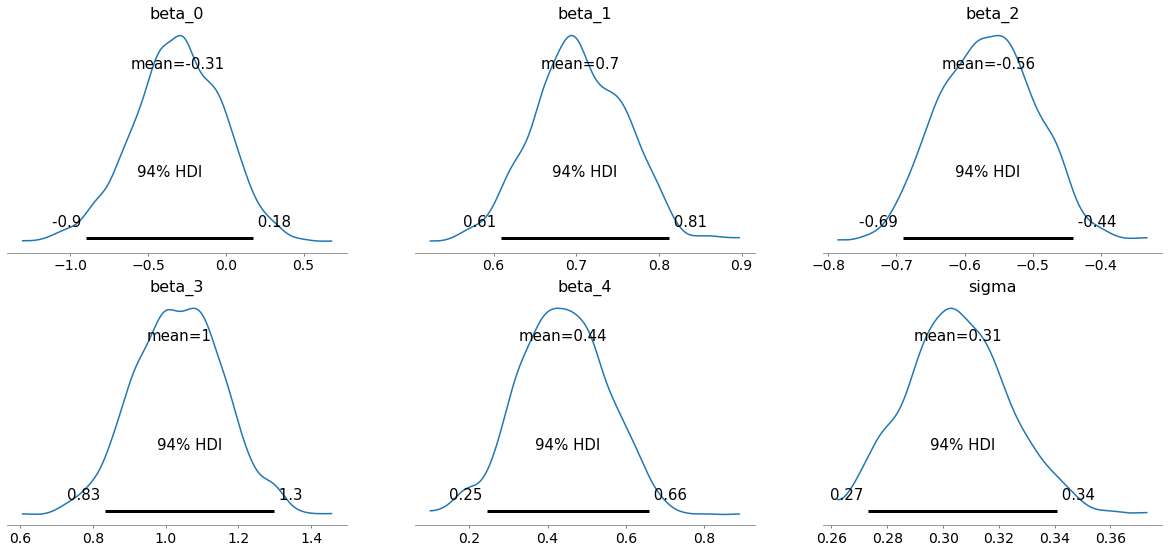

In [22]:
with model:
    az.plot_posterior(trace)
    plt.show()

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd746772b0>,
      dtype=object)

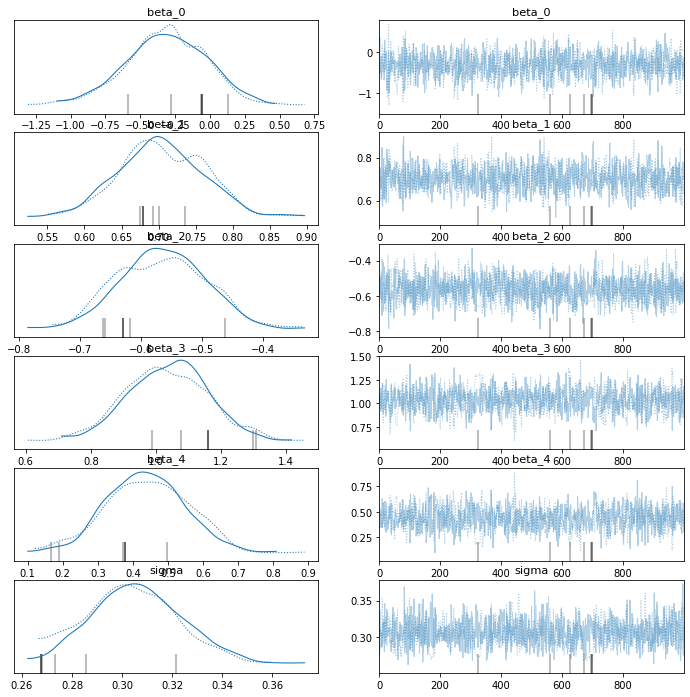

In [23]:
az.plot_trace(trace)